In [1]:
#Loading the libraries
import pandas as pd
import numpy as np

In [2]:
#Loading the dataset
cust_travel=pd.read_csv("C:\\Users\\User\\Downloads\\archive.zip")
cust_travel

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [3]:
cust_travel.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
#Understand the Data
# See the no. of rows and columns
cust_travel.shape

(954, 7)

In [5]:
# Display the column names
cust_travel.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [6]:
#Shows a quick statistic summary of your data using describe
cust_travel.describe(include='all')

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
count,954.000000,954,954,954.000000,954,954,954.000000
unique,NaN,3,3,NaN,2,2,NaN
top,NaN,No,Middle Income,NaN,No,No,NaN
freq,NaN,608,409,NaN,594,576,NaN
mean,32.109015,NaN,NaN,2.437107,NaN,NaN,0.234801
std,3.337388,NaN,NaN,1.606233,NaN,NaN,0.424097
min,27.000000,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,30.000000,NaN,NaN,1.000000,NaN,NaN,0.000000
50%,31.000000,NaN,NaN,2.000000,NaN,NaN,0.000000
75%,35.000000,NaN,NaN,4.000000,NaN,NaN,0.000000


In [7]:
#Display the datatypes of each feature
cust_travel.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

In [8]:
for col in['FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot']:
    cust_travel[col]=cust_travel[col].astype('category')

In [9]:
cust_travel.dtypes

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object

In [10]:
cust_travel.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [11]:
cust_travel.shape

(954, 7)

In [12]:
#Shows a quick statistic summary of your data using describe
cust_travel.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [13]:
# Handling Missing Data

#Missing value analysis and dropping the records with missing values

#identify total no. of null values for each column
cust_travel.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from sklearn import metrics

In [15]:
target_variable=cust_travel['Target']

In [16]:
#targetvariable
cust_travel['Target']=cust_travel['Target'].map(lambda x: 1 if x=='yes' else 0)

In [17]:
cust_travel.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [18]:
#checking categorical columns(object type)
categorical_Attributes=cust_travel.select_dtypes(include=['category']).columns
categorical_Attributes

Index(['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot'],
      dtype='object')

In [19]:
cust_travel=pd.get_dummies(columns=categorical_Attributes,data=cust_travel,prefix=categorical_Attributes,prefix_sep="_",drop_first=True)
print(cust_travel.columns,cust_travel.shape)

Index(['Age', 'ServicesOpted', 'Target', 'FrequentFlyer_No Record',
       'FrequentFlyer_Yes', 'AnnualIncomeClass_Low Income',
       'AnnualIncomeClass_Middle Income', 'AccountSyncedToSocialMedia_Yes',
       'BookedHotelOrNot_Yes'],
      dtype='object') (954, 9)


In [20]:
cust_travel.head()

,Age,ServicesOpted,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
0,34,6,0,0,0,0,1,0,1
1,34,5,1,0,1,1,0,1,0
2,37,3,0,0,0,0,1,1,0
3,30,2,0,0,0,0,1,0,0
4,30,1,0,0,0,1,0,0,0


In [21]:
pd.value_counts(cust_travel['Target'].values)

0    730
1    224
dtype: int64

In [22]:
cust_travel['Target'].value_counts(normalize=True)

0    0.765199
1    0.234801
Name: Target, dtype: float64

In [23]:
cust_travel['Target'].value_counts(normalize=False)

0    730
1    224
Name: Target, dtype: int64

In [24]:
cust_travel_num=cust_travel.select_dtypes(include=['int64','float64'])
cust_travel_num

,Age,ServicesOpted,Target
0,34,6,0
1,34,5,1
2,37,3,0
3,30,2,0
4,30,1,0
...,...,...,...
949,31,1,0
950,30,5,0
951,37,4,0
952,30,1,0


In [25]:
cust_travel_num=cust_travel.select_dtypes(include=['int64','float64']).columns
cust_travel_num

Index(['Age', 'ServicesOpted', 'Target'], dtype='object')

In [26]:
cust_travel.head()

,Age,ServicesOpted,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
0,34,6,0,0,0,0,1,0,1
1,34,5,1,0,1,1,0,1,0
2,37,3,0,0,0,0,1,1,0
3,30,2,0,0,0,0,1,0,0
4,30,1,0,0,0,1,0,0,0


In [80]:
y=cust_travel['Target']

X=cust_travel.drop('Target',axis=1)

In [28]:
#Split the data in to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [29]:
X_train.shape

(715, 8)

In [30]:
X_train.columns

Index(['Age', 'ServicesOpted', 'FrequentFlyer_No Record', 'FrequentFlyer_Yes',
       'AnnualIncomeClass_Low Income', 'AnnualIncomeClass_Middle Income',
       'AccountSyncedToSocialMedia_Yes', 'BookedHotelOrNot_Yes'],
      dtype='object')

In [31]:
#recursive feature elimination technique
from sklearn.feature_selection import RFE
DT=tree.DecisionTreeClassifier(random_state=42)
rfe_DT=RFE(DT,n_features_to_select=4,verbose=4)
rfe_DT.fit(X_train,y_train)
names=X_train.columns.tolist()
b=rfe_DT.ranking_
#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model
a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])
#a.to_csv('feature_selection.csv')
RFE_selected=a['features'][a['rank']==1]
RFE_selected

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


0    AccountSyncedToSocialMedia_Yes
1                               Age
2                 FrequentFlyer_Yes
3                     ServicesOpted
Name: features, dtype: object

In [32]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

In [33]:
X_test.shape,X_train.shape

((239, 4), (715, 4))

In [81]:
#Building a Basic Decision Tree Model

#default decision tree algorithm
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state=10)
clf_LR.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [36]:
clf

DecisionTreeClassifier()

In [37]:
#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [38]:
train_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [39]:
test_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [40]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)
#True values vs Model predicted

[[522  18]
 [ 51 124]]


In [41]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[176  14]
 [ 22  27]]


In [42]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

In [43]:
print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9666666666666667
Train TPR:  0.7085714285714285
Train Accuracy:  0.9034965034965035


In [44]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test=confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
TPR_Test=confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Test TNR:',TNR_Test)
print('Test TPR:',TPR_Test)
print('Test Accuracy:',Accuracy_Test)

Test TNR: 0.9263157894736842
Test TPR: 0.5510204081632653
Test Accuracy: 0.8493723849372385


In [45]:
clf

DecisionTreeClassifier()

In [46]:
clf.feature_importances_

array([0.05261836, 0.32009427, 0.29212092, 0.33516646])

In [47]:
cust_travel.shape

(954, 9)

In [48]:
importances = clf.feature_importances_

In [49]:
importances.shape

(4,)

In [50]:
clf.feature_importances_

array([0.05261836, 0.32009427, 0.29212092, 0.33516646])

In [51]:
df_imp=pd.DataFrame({'features':X_train.columns,'importances':clf.feature_importances_})

df_imp=df_imp.sort_values(by='importances',ascending=False)

df_imp

,features,importances
3,ServicesOpted,0.335166
1,Age,0.320094
2,FrequentFlyer_Yes,0.292121
0,AccountSyncedToSocialMedia_Yes,0.052618


In [52]:
clf.feature_importances_
features=cust_travel.columns
importances=clf.feature_importances_
indices=np.argsort(importances)[::-1]
pd.DataFrame([cust_travel.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3
0,FrequentFlyer_No Record,ServicesOpted,Target,Age
1,0.335166,0.320094,0.292121,0.052618


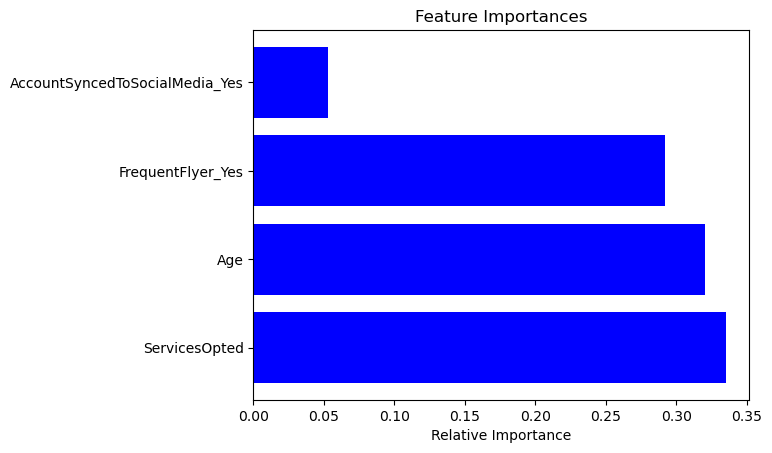

In [53]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['importances'], color='blue')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

In [54]:
'''clf=tree.DecisionTreeClassifier(max_depth=10)
clf=clf.fit(X_train,y_train)
train_pred=clf.predict(X_train)
tet_pred=clf.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,test_pred)
confusion_matrix_train=confusion_matrix(y_train,train_pred)
print(confusion_matrix_test)
print(confusion_matrix_train)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train=confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train=confusion_matrix_train[0,0]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
train_results.append(Accuracy_Train)

print('Train TNR:',TNR_Train)
print('Train TPR:',TPR_Train)
print('Train Accuracy:',Accuracy_Train)
  
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
test_results.append(Accuracy_Test)
TNR_Test=confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
TPR_Test=confusion_matrix_test[0,0]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Test TNR:',TNR_Test)
print('Test TPR:',TPR_Test)
print('Test Accuracy:',Accuracy_Test)

[[176  14]
 [ 22  27]]
[[522  18]
 [ 51 124]]


NameError: name 'train_results' is not defined

In [ ]:
'''
#default
Train TNR:  0.9888888888888889
Train TPR:  0.8342857142857143
Train Accuracy:  0.95104895104895
Test TNR: 0.9526315789473684
Test TPR: 0.6938775510204082
Test Accuracy: 0.899581589958159
    
    
    
Train TNR: 0.9888888888888889
Train TPR: 3.0514285714285716
Train Accuracy: 0.951048951048951
Test TNR: 0.9526315789473684
Test TPR: 3.693877551020408
Test Accuracy: 0.899581589958159

In [55]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
max_depths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [56]:
max_depths=[2,3,4,5,6,7,8,9,10]

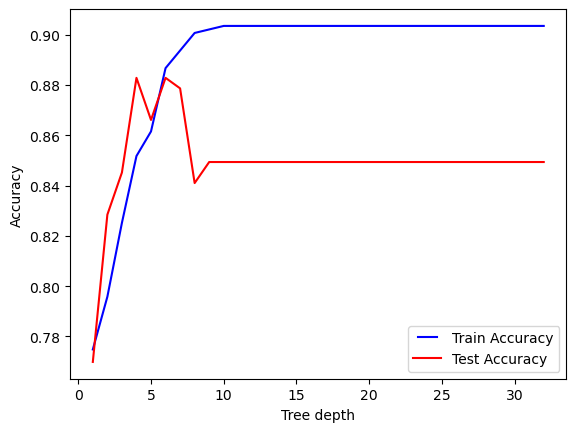

In [57]:
#How do we arrive at the best tree depth for this data?
max_depths = np.int64(np.linspace(1, 32, 32, endpoint=True))
train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

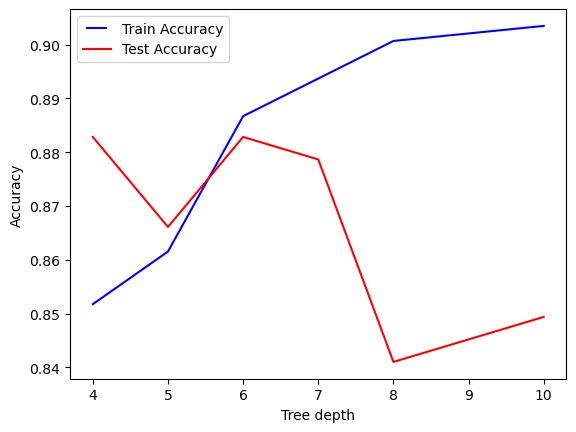

In [58]:
#How do we arrive at the best tree depth for this data?
max_depths=np.int64(np.linspace(4, 10, 6, endpoint=True))
train_results=[]
test_results=[]
for max_depth in max_depths:
    dt=tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)

    train_pred=dt.predict(X_train)
    confusion_matrix_train=confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred=dt.predict(X_test)
    confusion_matrix_test=confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1,=plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2,=plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

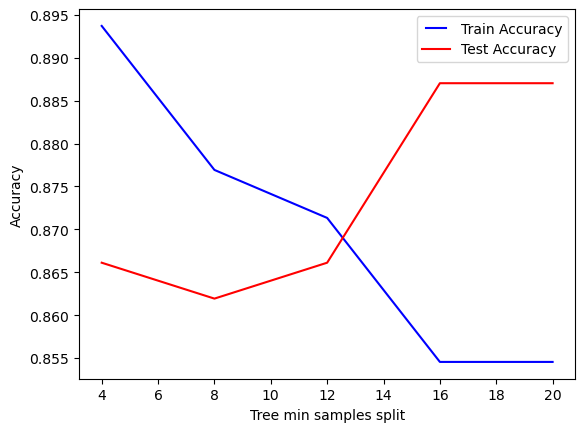

In [59]:
#How do we arrive at the best tree min_samples_leaf for this data?
min_samples_leafs=[4,8,12,16,20]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

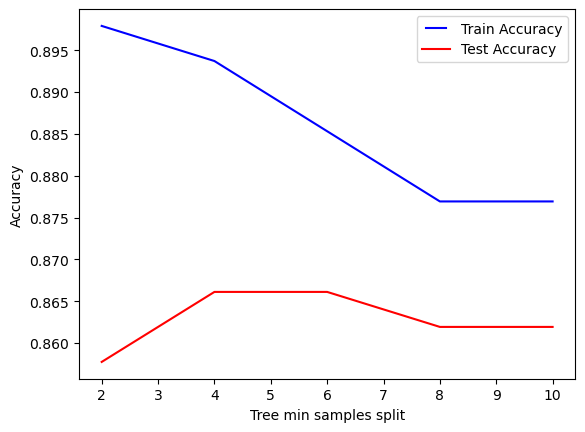

In [60]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[2,4,6,8,10]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

In [61]:
#set of parameters to test
#Hyperparameter Tuning
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 4, 10],
              "max_depth": [None, 4,5,6,7,8,9,10],
              "min_samples_leaf": [2,4,6],
              "max_leaf_nodes": [None, 50, 60, 70],
              }

In [62]:
#Use the GridSearchCV
#It is one of the HYperparameter tuinning method
dt = tree.DecisionTreeClassifier() #estimator
clf2 = GridSearchCV(dt, param_grid, cv=3)
clf2.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [None, 50, 60, 70],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 10]})

In [63]:
clf2.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [64]:
clf2.cv_results_

{'mean_fit_time': array([0.00340128, 0.00613705, 0.0056107 , 0.00561357, 0.        ,
        0.00527199, 0.00522709, 0.01160431, 0.00523114, 0.01127179,
        0.00562874, 0.00534217, 0.        , 0.00522224, 0.00552607,
        0.        , 0.        , 0.01137598, 0.        , 0.00780368,
        0.00561428, 0.00732009, 0.01118724, 0.00522399, 0.00158413,
        0.00573397, 0.00117811, 0.01122546, 0.        , 0.        ,
        0.        , 0.00624998, 0.00521326, 0.01043002, 0.        ,
        0.        , 0.        , 0.00520706, 0.01041444, 0.00917117,
        0.00647195, 0.0059553 , 0.01125288, 0.00522129, 0.01161997,
        0.00200844, 0.01147064, 0.00558869, 0.01103894, 0.00626977,
        0.00662184, 0.00597707, 0.011525  , 0.00558154, 0.01086497,
        0.0052259 , 0.        , 0.00522105, 0.00520706, 0.01039855,
        0.0052228 , 0.        , 0.        , 0.        , 0.01039886,
        0.00563105, 0.01086815, 0.        , 0.00068267, 0.        ,
        0.        , 0.00521421,

In [65]:
#Predicting on Train and Test
train_pred = clf2.predict(X_train)
test_pred = clf2.predict(X_test)

In [66]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.9259259259259259
Train TPR:  0.6228571428571429
Train Accuracy:  0.8517482517482518
Test TNR:  0.9421052631578948
Test TPR:  0.6530612244897959
Test Accuracy:  0.8828451882845189


In [67]:
clf2.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [68]:
clf2.best_estimator_.feature_importances_

array([0.04728718, 0.23809896, 0.41668514, 0.29792872])

In [69]:
df_imp=pd.DataFrame({'features':X_train.columns,'imortances':clf2.best_estimator_.feature_importances_})

df_imp=df_imp.sort_values(by='imortances',ascending=False)

df_imp

,features,imortances
2,FrequentFlyer_Yes,0.416685
3,ServicesOpted,0.297929
1,Age,0.238099
0,AccountSyncedToSocialMedia_Yes,0.047287


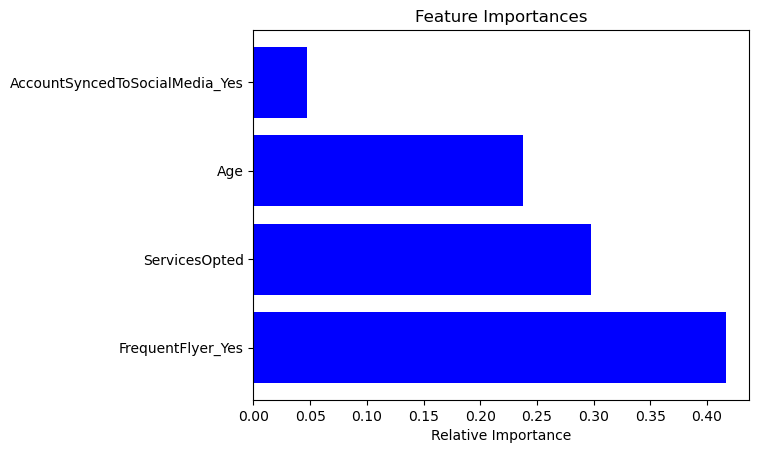

In [70]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['imortances'], color='blue')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

In [71]:
!pip install xgboost

In [72]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics

In [ ]:
'''def get_predictions(X_train,y_train):
    y_train_pred_final = pd.DataFrame({'Hotel_Boking':y_train.values, 'Customer_Satisfaction_prob':clf2.predict_proba(X_train)[:,1]})
    y_train_pred_final['Cust_Id'] = y_train.index
    y_train_pred_final = y_train_pred_final.reindex(['Cust_Id','Customer_Satifaction','Customer_Satisfaction_Prob'], axis=1)
    y_train_pred_final['predicted'] = y_train_pred_final.Customer_Satifaction_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final
    
y_train_pred_final=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final  

In [74]:
!pip install KNeighborsClassifier

ERROR: Could not find a version that satisfies the requirement KNeighborsClassifier (from versions: none)
ERROR: No matching distribution found for KNeighborsClassifier


In [75]:
#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel = 'linear', gamma = 'auto', C = 5, probability = True),
    LinearSVC(),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [76]:
#report models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 82.8452%
Log Loss: 6.183220874283696




C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


SVC
****Results****
Accuracy: 76.9874%
Log Loss: 8.294564587453738


LinearSVC
****Results****
Accuracy: 84.1004%
Log Loss: 5.730790078604402


DecisionTreeClassifier
****Results****
Accuracy: 84.5188%
Log Loss: 5.579979813377968




C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.

RandomForestClassifier
****Results****
Accuracy: 84.5188%
Log Loss: 5.579979813377968


XGBClassifier
****Results****
Accuracy: 84.9372%
Log Loss: 5.429169548151537




C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


AdaBoostClassifier
****Results****
Accuracy: 84.9372%
Log Loss: 5.429169548151537




C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


GradientBoostingClassifier
****Results****
Accuracy: 89.5397%
Log Loss: 3.77025663066079


GaussianNB
****Results****
Accuracy: 76.9874%
Log Loss: 8.294564587453738


LinearDiscriminantAnalysis
****Results****
Accuracy: 81.1715%
Log Loss: 6.786461935189422


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 82.0084%
Log Loss: 6.484841404736559




C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\User\AppData\Local\Temp\ipykernel_13740\3877793298.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


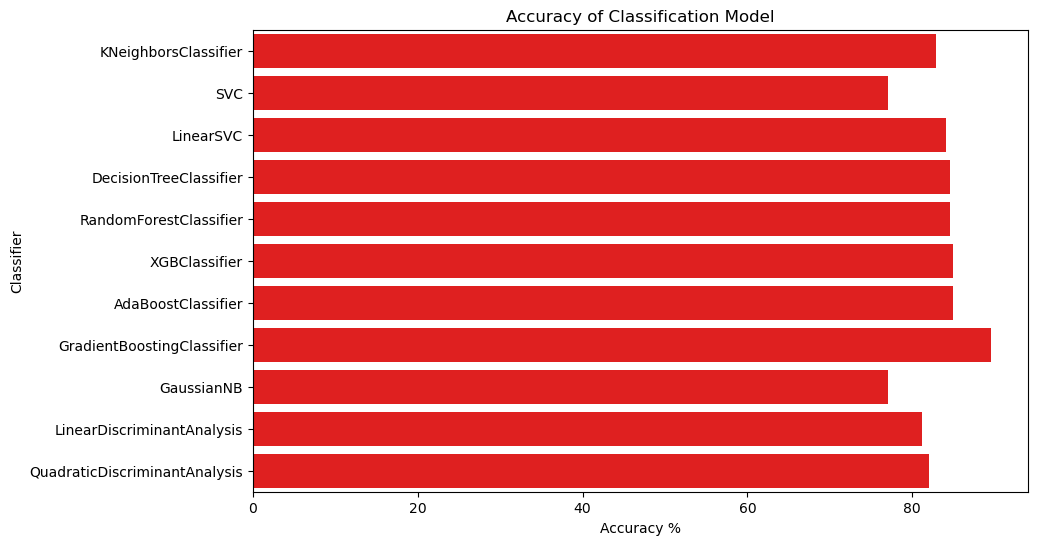

In [82]:
#visualize accuracy models
plt.figure(figsize = (10,6))
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "red")
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()
sns.set_color_codes("muted")
plt.show()

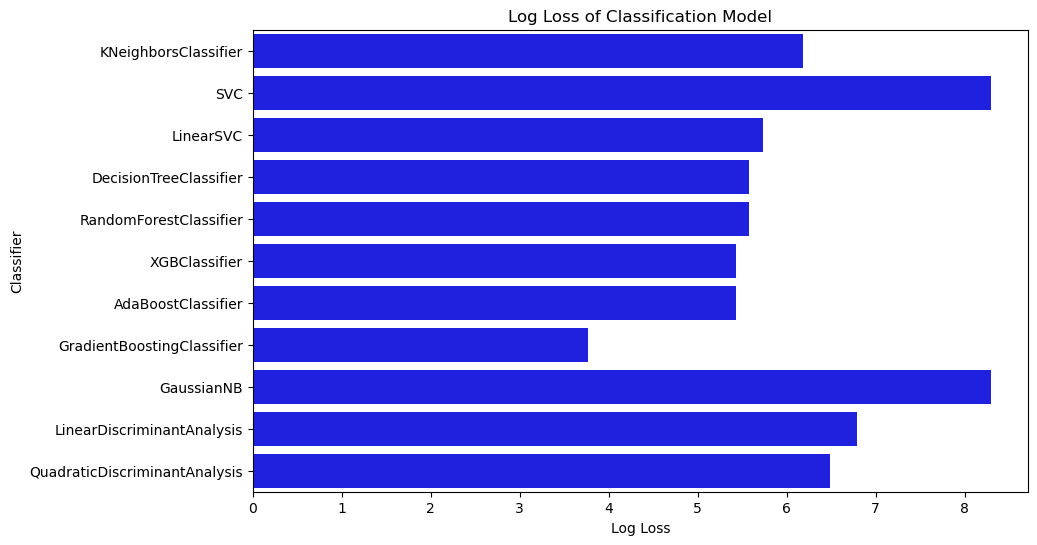

In [83]:
#visualize log loss models
plt.figure(figsize = (10,6))
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = "blue")
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

In [77]:
xgb = XGBClassifier()
%time xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

CPU times: total: 359 ms
Wall time: 125 ms


0.8493723849372385

In [84]:
#prediction
y_pred = xgb.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [85]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       190
           1       0.66      0.55      0.60        49

    accuracy                           0.85       239
   macro avg       0.77      0.74      0.75       239
weighted avg       0.84      0.85      0.84       239



In [79]:
'''def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train=generate_model_result_proba(y_train,y_train_pred_final['predicted'])

NameError: name 'y_train_pred_final' is not defined

In [ ]:
result_df_train

In [ ]:
y_test_pred_final=get_predictions(X_test,y_test)    
# Let's see the head
y_test_pred_final.head() 

In [ ]:
result_df_test=generate_model_result_proba(y_test,y_test_pred_final['predicted'])

In [ ]:
result_df_test